# Predikcia kvality vína
V tomto cvičení preskúmame, ako použiť strojové učenie na predikciu kvality vína na základe jeho chemických vlastností. Prejdeme si základné kroky pracovného postupu strojového učenia vrátane načítania dát, predspracovania, trénovania modelu a hodnotenia.

## Časť 1: Načítanie dát
Najprv musíme načítať náš dataset. Použijeme dataset kvality vína, ktorý obsahuje chemické vlastnosti vína a hodnotenie kvality.

<details>
  <summary>Hint (click to expand)</summary>
  Pri načítaní dát použite knižnicu Pandas. Funkcia `read_csv` je užitočná na načítanie dát z CSV súborov.
</details>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

# Načítanie datasetu
wine_data = pd.read_csv('data/winequality-red.csv', sep=';')

# Zobrazíme prvých 5 riadkov datasetu
print(wine_data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

Úloha: Zobrazte prvých 5 riadkov datasetu, aby ste pochopili jeho štruktúru. Použite `wine_data.head()`.

Reflexná otázka: Prečo je dôležité preskúmať dáta pred ich ďalším spracovaním? Ako môže formát dát ovplyvniť ich načítanie?

## Časť 2: Prieskum dát
Predtým, než prejdeme na predspracovanie dát, preskúmajme trochu náš dataset.

<details>
  <summary>Hint (click to expand)</summary>
  Vizualizácia distribúcie cieľovej premennej môže poskytnúť užitočné informácie o jej rozložení. Použite knižnicu Seaborn na vykreslenie grafu.
</details>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


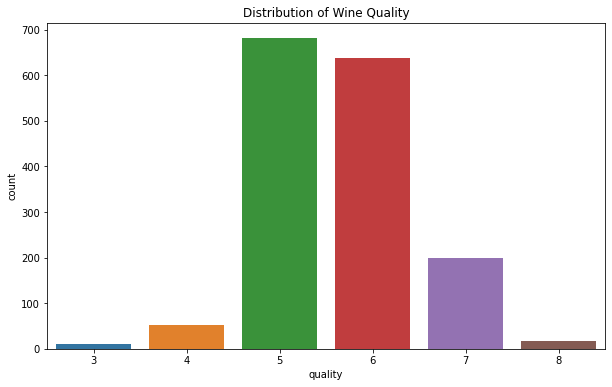

In [10]:
# Zobrazenie základných informácií o datasete
wine_data.info()
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=wine_data)
plt.title('Distribution of Wine Quality')
plt.show()

Úloha: Vykreslite distribúciu premennej 'quality', aby ste videli, ako je distribuovaná kvalita vína. Použite knižnice ako `matplotlib` alebo `seaborn` pre vizualizáciu.

Reflexná otázka: Aké zistenia ste urobili z vizualizácie distribúcie kvality vína? Ako by tieto informácie mohli ovplyvniť výber a trénovanie modelu strojového učenia?

## Časť 3: Predspracovanie dát
### Riešenie chýbajúcich hodnôt
Najprv skontrolujeme chýbajúce hodnoty a zaoberáme sa nimi, ak nejaké sú.

In [11]:
# Kontrola chýbajúcich hodnôt
print(wine_data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


### Škálovanie prvkov
Mnoho modelov strojového učenia lepšie funguje, keď sú vstupné numerické premenné škálované alebo normalizované.

<details>
  <summary>Hint (click to expand)</summary>
  Pred trénovaním modelu je často potrebné dáta normalizovať alebo škálovať. Použite `StandardScaler` z knižnice Scikit-learn na škálovanie funkcií.
</details>

In [ ]:
from sklearn.preprocessing import StandardScaler

# Škálovanie
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Škálovanie prvkov
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Úloha: Škálovajte prvky a overte to zobrazením prvých 5 riadkov škálovaných prvkov.

Reflexná otázka: Prečo je škálovanie prvkov dôležité pri trénovaní modelov strojového učenia? Ako by mohlo ovplyvniť výsledky, keby sme dáta neškálovali?

## Časť 4: Rozdelenie datasetu
Rozdelíme dataset na trénovaciu a testovaciu množinu.

<details>
  <summary>Hint (click to expand)</summary>
  Rozdelenie dát na trénovaciu a testovaciu sadu pomáha overiť, ako dobre model funguje na nevidených dátach.
</details>

In [12]:
# Part 4: Splitting the Dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Časť 5: Trénovanie modelu
Použijeme model Random Forest na predikciu kvality vína.

In [13]:
# Part 5: Model Training (Random Forest)
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Training score
print("Training Accuracy (Random Forest):", model_rf.score(X_train, y_train))

Training Accuracy (Random Forest): 1.0


## Časť 6: Hodnotenie modelu
Nakoniec, poďme hodnotiť náš model na testovacej množine.

In [14]:
# Part 6: Model Evaluation (Random Forest)
y_pred_rf = model_rf.predict(X_test)
print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

Accuracy (Random Forest): 0.65

Classification Report (Random Forest):
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.71      0.74      0.72       130
           6       0.62      0.68      0.65       132
           7       0.63      0.52      0.57        42
           8       0.00      0.00      0.00         5

    accuracy                           0.65       320
   macro avg       0.33      0.32      0.32       320
weighted avg       0.62      0.65      0.64       320



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Časť 7: Experimentovanie a záver
Skúste rôzne strojové učenie modely, techniky predspracovania alebo metódy inžinierstva prvkov na zlepšenie výkonnosti modelu.

In [15]:
# Trying another model for comparison: Logistic Regression
model_lr = LogisticRegression(max_iter=10000, random_state=42)
model_lr.fit(X_train, y_train)

# Training score
print("Training Accuracy (Logistic Regression):", model_lr.score(X_train, y_train))

# Model Evaluation (Logistic Regression)
y_pred_lr = model_lr.predict(X_test)
print("Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report (Logistic Regression):\n", classification_report(y_test, y_pred_lr))

Training Accuracy (Logistic Regression): 0.619233776387803
Accuracy (Logistic Regression): 0.575

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.10      0.18        10
           5       0.63      0.75      0.69       130
           6       0.54      0.58      0.56       132
           7       0.39      0.21      0.28        42
           8       0.00      0.00      0.00         5

    accuracy                           0.57       320
   macro avg       0.43      0.27      0.28       320
weighted avg       0.56      0.57      0.55       320



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
